In [ ]:
!pip install seed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 366 kB 14.7 MB/s 
  Created wheel for seed: filename=seed-0.11.3-py3-none-any.whl size=17754 sha256=b4f76231ba532e7be5988d6dced72ac8192bb65898e3cdaee5b1308d557e5371
  Stored in directory: /root/.cache/pip/wheels/60/f3/73/242cbc083d7dc711389683708d1dda67b4e6072b63ea25b006
Successfully built seed


In [37]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [38]:
anger=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Anger.csv",index_col=False)
anti=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Anticipation.csv",index_col=False)
anti=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Anticipation.csv",index_col=False)
dis=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Disgust.csv",index_col=False)
fear=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Fear.csv",index_col=False)
joy=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Joy.csv",index_col=False)
pos=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Positive.csv",index_col=False)
neg=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Negative.csv",index_col=False)
sad=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Sadness.csv",index_col=False)
sur=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Surprise.csv",index_col=False)
trust=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/Emotion_Dynamics_Result/Trust.csv",index_col=False)


In [39]:
crypto=pd.read_csv("/content/drive/MyDrive/senti-twitter-pred/BTC Dataset/BTCUSD_1h.csv")

In [40]:
anger['date']=anger['Date'].apply(lambda x:x[0:19])
anti['date']=anti['Date'].apply(lambda x:x[0:19])
dis['date']=dis['Date'].apply(lambda x:x[0:19])
fear['date']=fear['Date'].apply(lambda x:x[0:19])
joy['date']=joy['Date'].apply(lambda x:x[0:19])
pos['date']=pos['Date'].apply(lambda x:x[0:19])
neg['date']=neg['Date'].apply(lambda x:x[0:19])
sad['date']=sad['Date'].apply(lambda x:x[0:19])
sur['date']=sur['Date'].apply(lambda x:x[0:19])
trust['date']=trust['Date'].apply(lambda x:x[0:19])

In [41]:
anger['date']=anger['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
anti['date']=anti['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
dis['date']=dis['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
fear['date']=fear['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
joy['date']=joy['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
pos['date']=pos['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
neg['date']=neg['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
sad['date']=sad['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
sur['date']=sur['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))
trust['date']=trust['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))

In [42]:
anger['date']=anger['date'].apply(lambda x:x.replace(minute=0,second=0))
fear['date']=fear['date'].apply(lambda x:x.replace(minute=0,second=0))
anti['date']=anti['date'].apply(lambda x:x.replace(minute=0,second=0))
dis['date']=dis['date'].apply(lambda x:x.replace(minute=0,second=0))
joy['date']=joy['date'].apply(lambda x:x.replace(minute=0,second=0))
pos['date']=pos['date'].apply(lambda x:x.replace(minute=0,second=0))
neg['date']=neg['date'].apply(lambda x:x.replace(minute=0,second=0))
sad['date']=sad['date'].apply(lambda x:x.replace(minute=0,second=0))
sur['date']=sur['date'].apply(lambda x:x.replace(minute=0,second=0))
trust['date']=trust['date'].apply(lambda x:x.replace(minute=0,second=0))

In [43]:
anger_avg_emo=pd.DataFrame(anger.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
anti_avg_emo=pd.DataFrame(anti.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
dis_avg_emo=pd.DataFrame(dis.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
fear_avg_emo=pd.DataFrame(fear.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
joy_avg_emo=pd.DataFrame(joy.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
pos_avg_emo=pd.DataFrame(pos.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
neg_avg_emo=pd.DataFrame(neg.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
sad_avg_emo=pd.DataFrame(sad.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
sur_avg_emo=pd.DataFrame(sur.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))
trust_avg_emo=pd.DataFrame(trust.groupby('date',as_index=False).agg(avg_emo=('avgLexVal','mean')))

In [ ]:
crypto=crypto.iloc[:,1:]
crypto['date']=crypto['date'].apply(lambda x:pd.to_datetime(datetime.strftime(pd.to_datetime(x),"%Y-%m-%d %H:%M")))

In [ ]:
crypto['date']=crypto['date'].apply(lambda x:x.replace(minute=0,second=0))

In [ ]:

#print(min(crypto_avg['date']),max(crypto_avg['date']))

In [ ]:
#print(min(anger_avg_emo['date']),max(anger_avg_emo['date']))

In [ ]:
crypto_avg=pd.DataFrame(crypto.groupby('date',as_index=False).agg(({'open' : ['mean'], 'close' : ['mean'],'high' : ['mean'],'low':['mean'],'Volume BTC':['mean']})))
crypto_avg.columns=['date','open','close','high','low','volume']

In [ ]:
crypto_avg.head(3)
print(crypto_avg.shape)
anger_avg_emo.head(3)
print(anger.shape)
print(anger_avg_emo.shape)


(1536, 6)
(731608, 10)
(1512, 2)


In [ ]:
len(anger_avg_emo.date.unique())
print(anger_avg_emo.head(30))

                  date   avg_emo
0  2022-02-01 00:00:00  0.057131
1  2022-02-01 01:00:00  0.058205
2  2022-02-01 02:00:00  0.051390
3  2022-02-01 03:00:00  0.066346
4  2022-02-01 04:00:00  0.054093
5  2022-02-01 05:00:00  0.048968
6  2022-02-01 06:00:00  0.062202
7  2022-02-01 07:00:00  0.047580
8  2022-02-01 08:00:00  0.053266
9  2022-02-01 09:00:00  0.060888
10 2022-02-01 10:00:00  0.046106
11 2022-02-01 11:00:00  0.057920
12 2022-02-01 12:00:00  0.040051
13 2022-02-01 13:00:00  0.055625
14 2022-02-01 14:00:00  0.054109
15 2022-02-01 15:00:00  0.053679
16 2022-02-01 16:00:00  0.050173
17 2022-02-01 17:00:00  0.051007
18 2022-02-01 18:00:00  0.055319
19 2022-02-01 19:00:00  0.056223
20 2022-02-01 20:00:00  0.052827
21 2022-02-01 21:00:00  0.054103
22 2022-02-01 22:00:00  0.050045
23 2022-02-01 23:00:00  0.052550
24 2022-02-02 00:00:00  0.052839
25 2022-02-02 01:00:00  0.059117
26 2022-02-02 02:00:00  0.068473
27 2022-02-02 03:00:00  0.053878
28 2022-02-02 04:00:00  0.049760
29 2022-02

In [ ]:
 def lag_data(crypto_data,lag): 
   crypto_data.set_index('date', inplace=True)
   crypto_data['lag_open'] = crypto_data.shift(lag)['open'].values
   
   crypto_data['lag_close'] = crypto_data.shift(lag)['close'].values
   
   crypto_data['lag_high'] = crypto_data.shift(lag)['high'].values
   
   crypto_data['lag_low'] = crypto_data.shift(lag)['low'].values
   
   crypto_data['lag_volume'] = crypto_data.shift(lag)['volume'].values
   
   crypto_data.reset_index(inplace = True)
   return (crypto_data)
    

In [ ]:
def merge_data(cryp_data,emo_data):
  df_final = pd.merge(cryp_data,emo_data, how='inner', on='date')
  return(df_final)

In [ ]:
crypto_lag_data=lag_data(crypto_avg,1)

In [ ]:
anger_merged_lag=merge_data(crypto_lag_data,anger_avg_emo)
anti_merged_lag=merge_data(crypto_lag_data,anti_avg_emo)
dis_merged_lag=merge_data(crypto_lag_data,dis_avg_emo)
fear_merged_lag=merge_data(crypto_lag_data,fear_avg_emo)
joy_merged_lag=merge_data(crypto_lag_data,joy_avg_emo)
trust_merged_lag=merge_data(crypto_lag_data,trust_avg_emo)
sad_merged_lag=merge_data(crypto_lag_data,sad_avg_emo)
sur_merged_lag=merge_data(crypto_lag_data,sur_avg_emo)
pos_merged_lag=merge_data(crypto_lag_data,pos_avg_emo)
neg_merged_lag=merge_data(crypto_lag_data,neg_avg_emo)

In [ ]:
anger_merged_lag.head(10)

,date,open,close,high,low,volume,lag_open,lag_close,lag_high,lag_low,lag_volume,avg_emo
0,2022-02-02 00:00:00,38768.08,38579.04,38883.96,38450.00,67.788763,46363.61,46307.81,46377.73,46138.88,17.102763,0.052839
1,2022-02-02 01:00:00,38578.32,38475.38,38696.00,38400.00,31.070860,38768.08,38579.04,38883.96,38450.00,67.788763,0.059117
2,2022-02-02 02:00:00,38478.61,38656.26,38696.28,38425.50,17.621919,38578.32,38475.38,38696.00,38400.00,31.070860,0.068473
3,2022-02-02 03:00:00,38653.34,38589.96,38779.38,38579.47,65.485055,38478.61,38656.26,38696.28,38425.50,17.621919,0.053878
4,2022-02-02 04:00:00,38575.46,38462.58,38580.44,38436.88,29.265835,38653.34,38589.96,38779.38,38579.47,65.485055,0.049760
5,2022-02-02 05:00:00,38442.73,38426.09,38526.57,38325.76,29.688108,38575.46,38462.58,38580.44,38436.88,29.265835,0.048913
6,2022-02-02 06:00:00,38420.09,38303.10,38551.09,38213.00,54.325715,38442.73,38426.09,38526.57,38325.76,29.688108,0.057604
7,2022-02-02 07:00:00,38303.00,38285.66,38413.55,38235.00,25.244611,38420.09,38303.10,38551.09,38213.00,54.325715,0.056479
8,2022-02-02 08:00:00,38314.36,38478.92,38498.52,38275.44,40.432324,38303.00,38285.66,38413.55,38235.00,25.244611,0.046233
9,2022-02-02 09:00:00,38483.81,38560.45,38583.33,38420.07,32.955340,38314.36,38478.92,38498.52,38275.44,40.432324,0.044766


In [ ]:
entire_text=' '.join(anger['text'])
#print(entire_text)


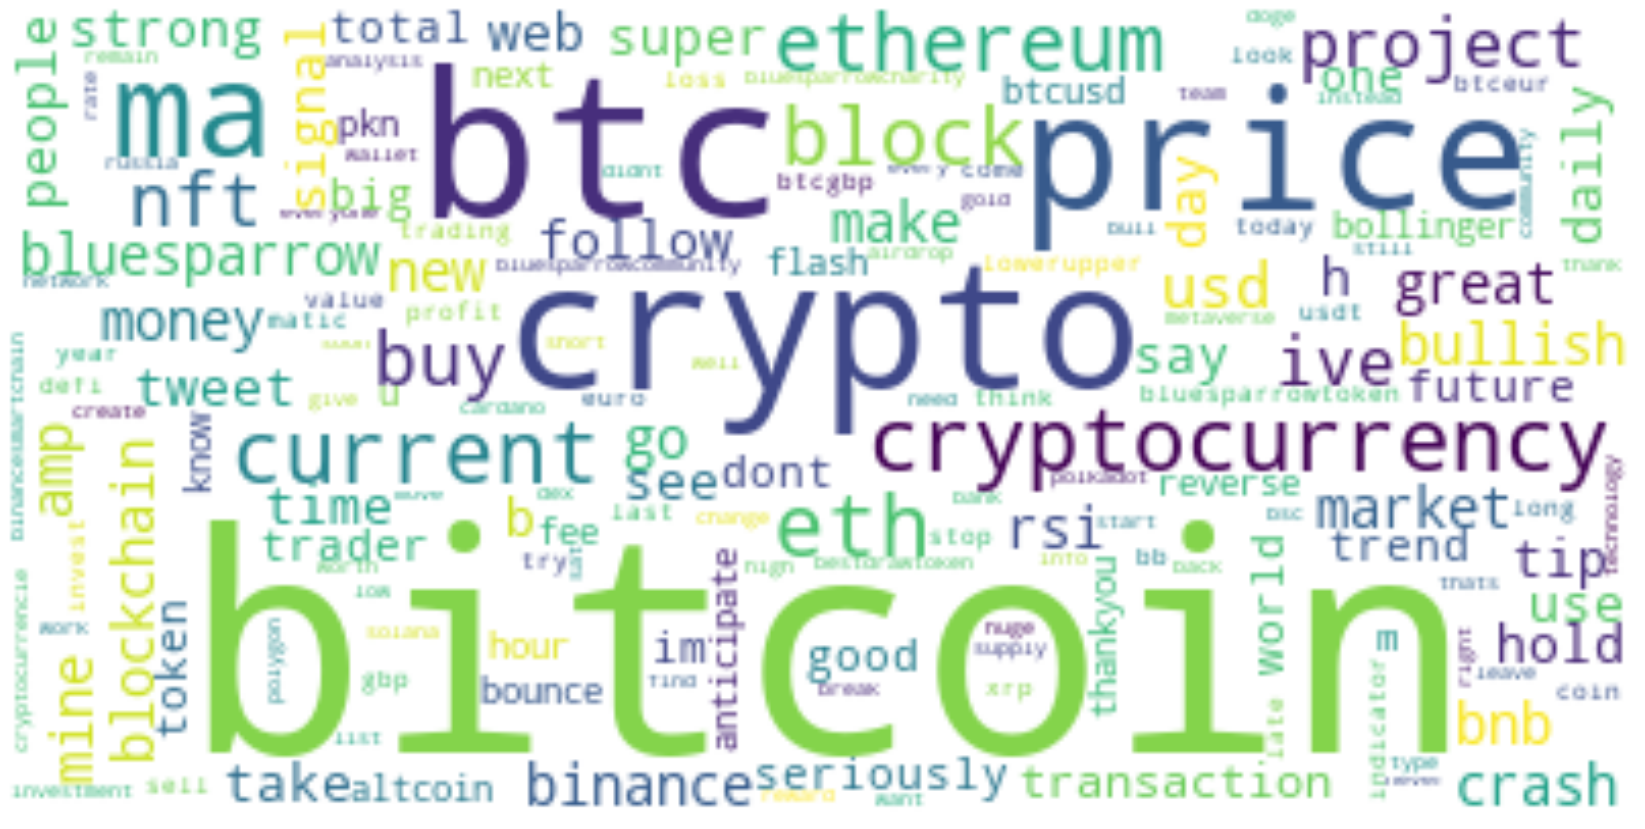

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(entire_text)
plt.figure(figsize=(30,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
len(anger['date'].unique())

1512

In [ ]:
anger['date_only']=anger['date'].apply(lambda x:x.date())

In [ ]:
tweet_count=anger.groupby('date_only',as_index=False).agg('count')
tweet_count.reset_index()
tweet_count=tweet_count[['date_only','Tweets']]
tweet_count.columns=['date','Tweets']

In [ ]:
fear_merged_lag['fear_mov_avg'] = fear_merged_lag.avg_emo.rolling(100, min_periods=1).mean()
anger_merged_lag['anger_mov_avg'] = anger_merged_lag.avg_emo.rolling(100, min_periods=1).mean()
joy_merged_lag['joy_mov_avg'] = joy_merged_lag.avg_emo.rolling(100, min_periods=1).mean()
sad_merged_lag['sad_mov_avg'] = sad_merged_lag.avg_emo.rolling(100, min_periods=1).mean()

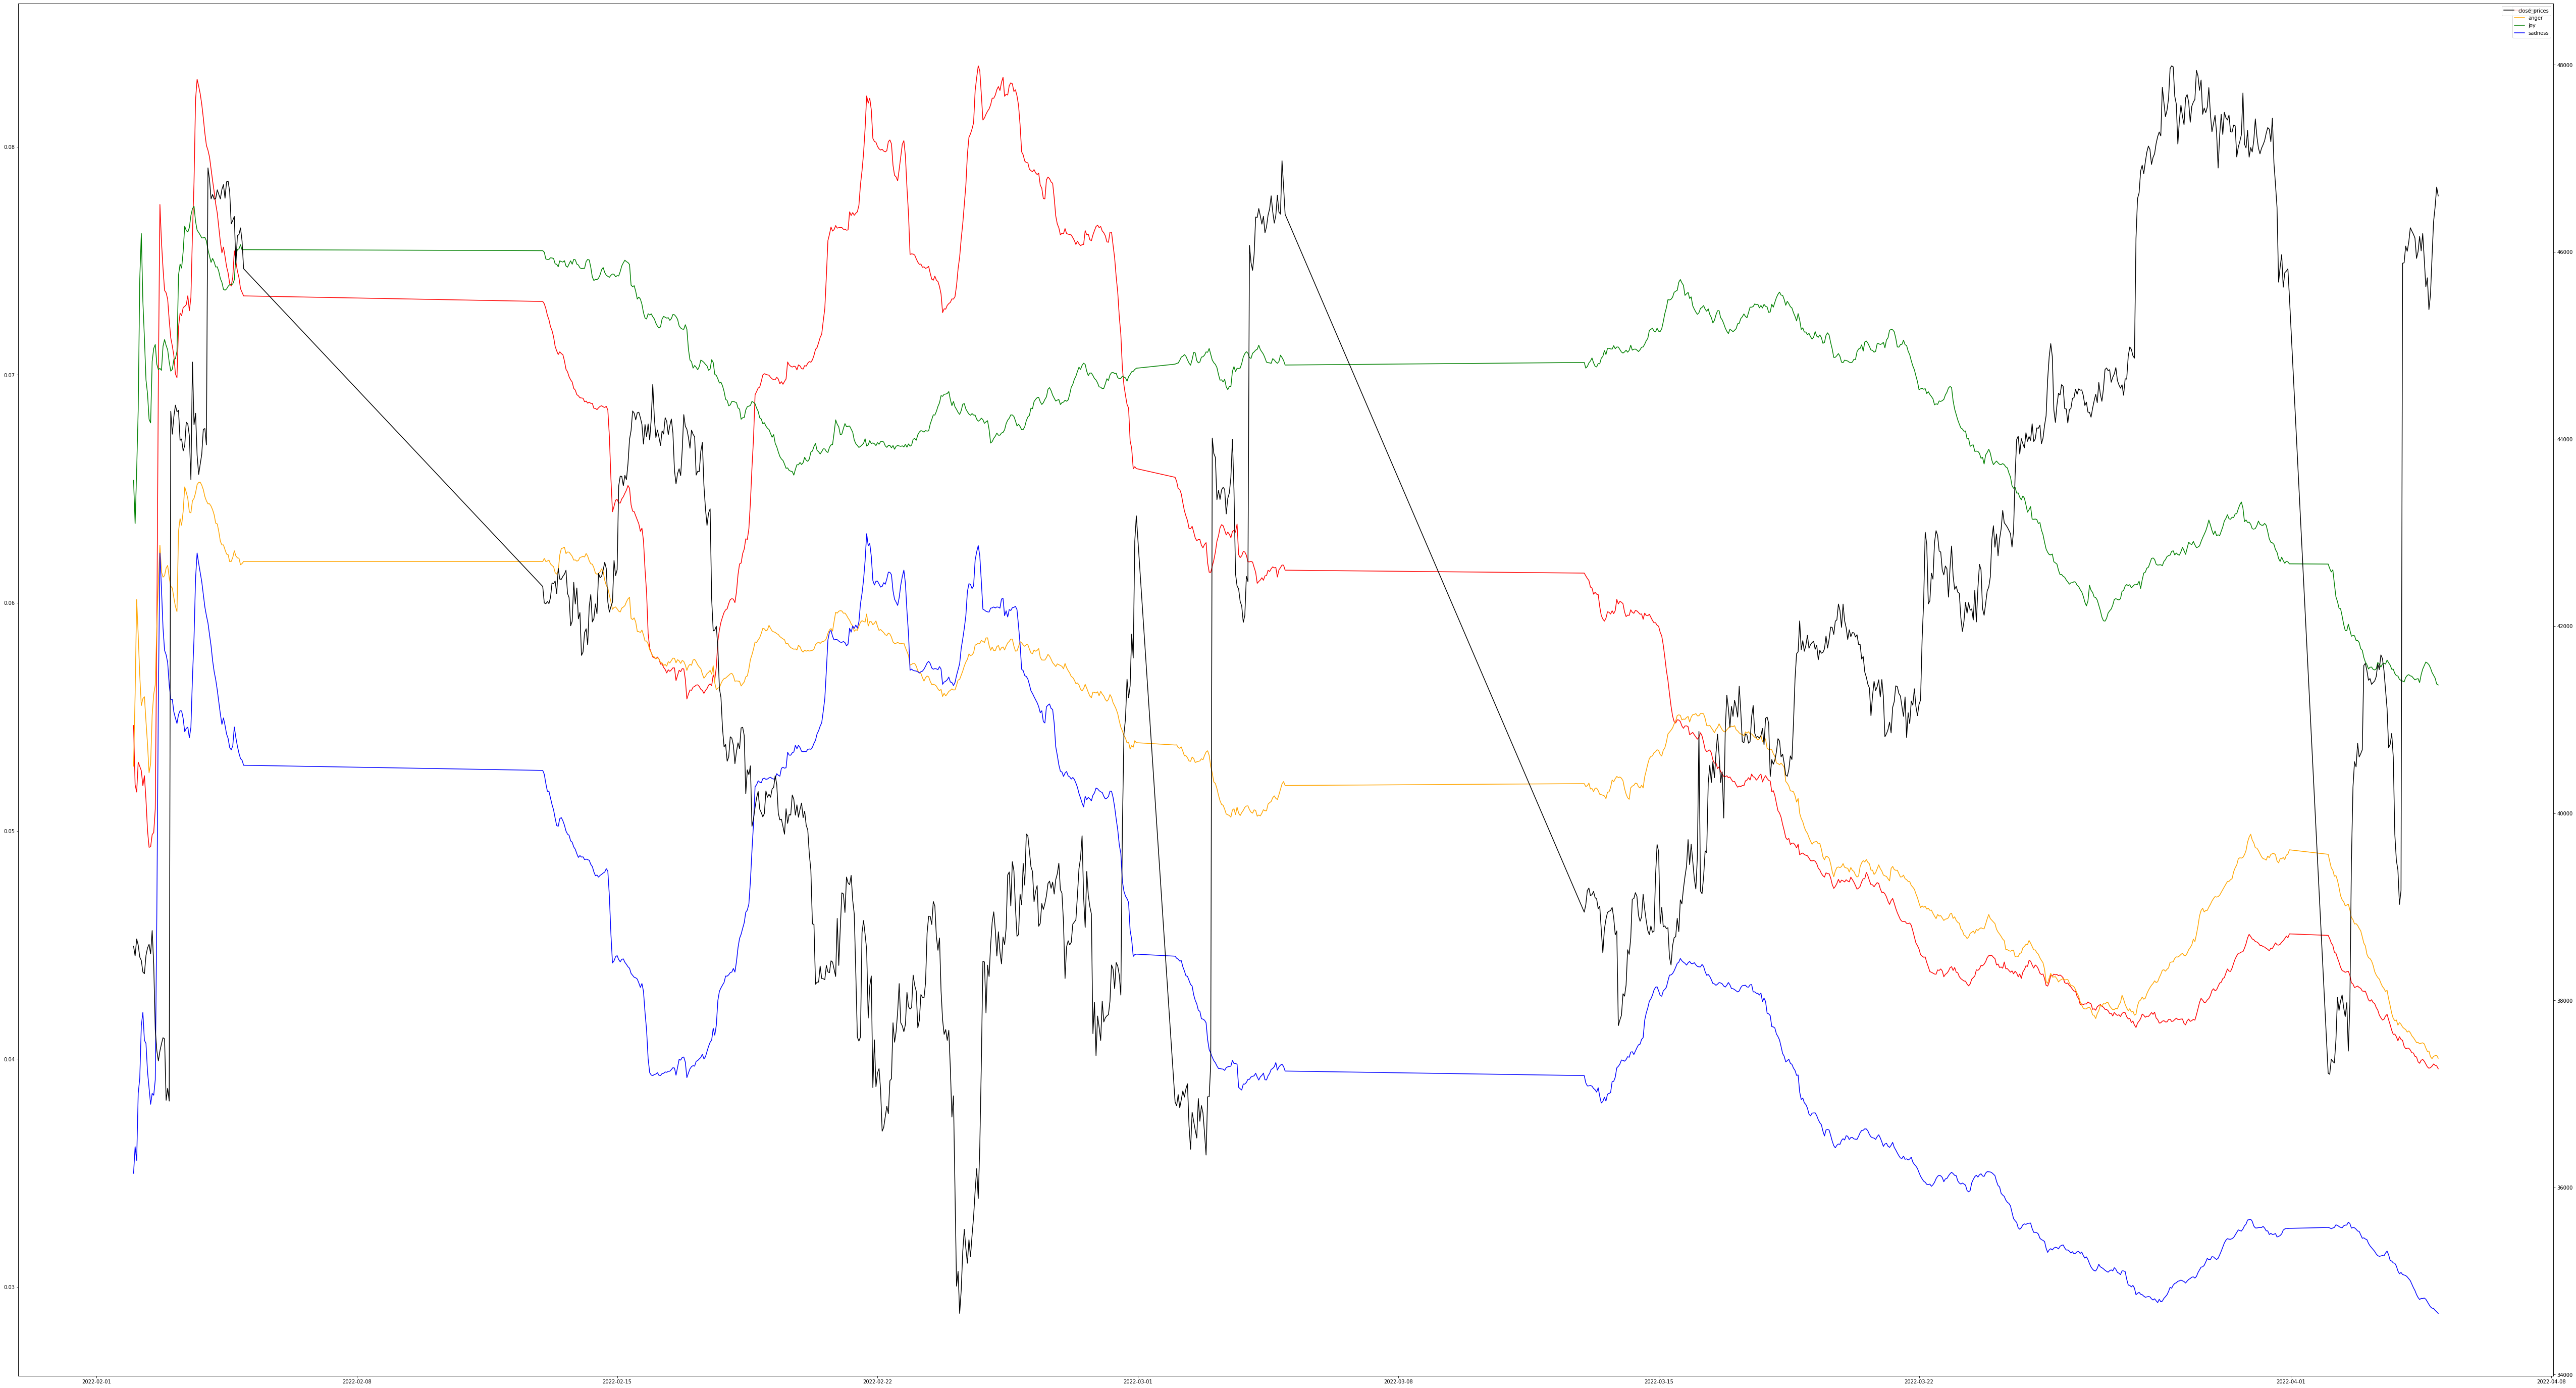

In [ ]:
fig,ax = plt.subplots(figsize=(90,50))
ax2=ax.twinx()
ax.plot(fear_merged_lag['date'],fear_merged_lag['fear_mov_avg'],color='red',label='fear')
ax.plot(anger_merged_lag['date'],anger_merged_lag['anger_mov_avg'],color='orange',label='anger')
ax.plot(joy_merged_lag['date'],joy_merged_lag['joy_mov_avg'],color='green',label='joy')
ax.plot(sad_merged_lag['date'],sad_merged_lag['sad_mov_avg'],color='blue',label='sadness')

ax2.plot(anger_merged_lag['date'],anger_merged_lag['close'],color="black",label='close_prices')
ax.legend()
ax2.legend()
plt.show()

KeyError: ignored

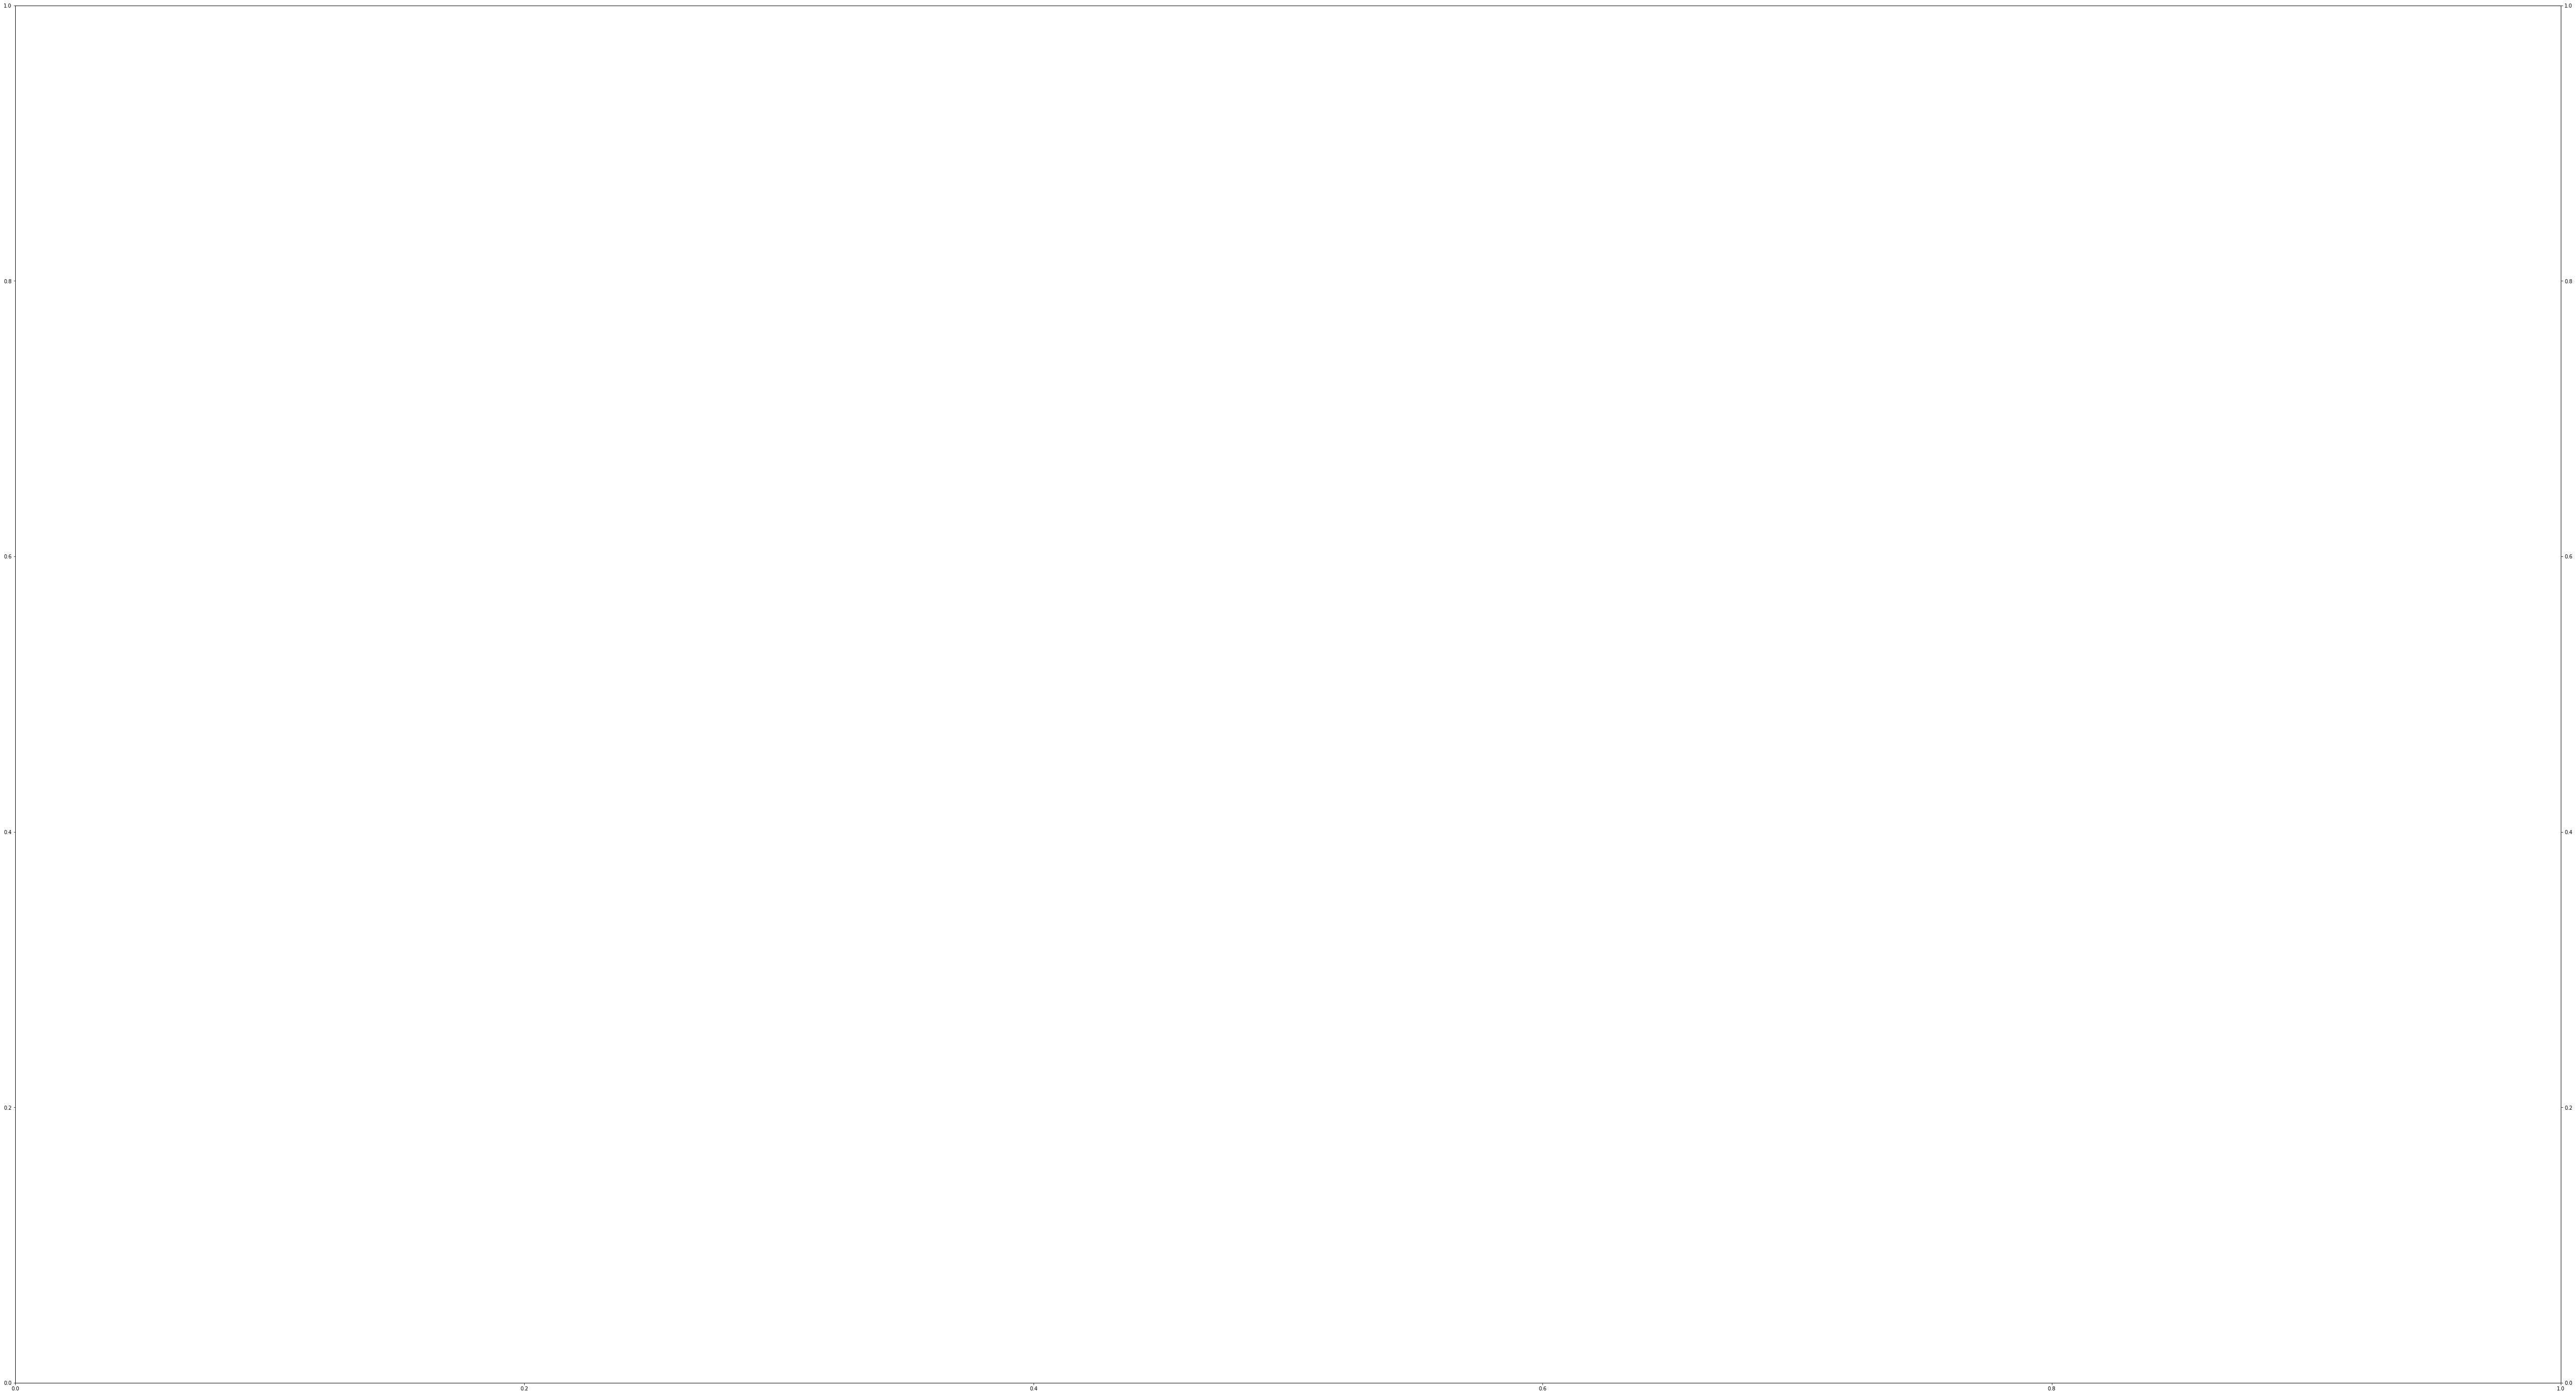

In [36]:

fig,ax = plt.subplots(figsize=(90,50))
ax2=ax.twinx()
ax.plot(fear_merged_lag['date'],fear_merged_lag['fear_mov_avg'],color='red',label='fear')
ax.plot(anger_merged_lag['date'],anger_merged_lag['anger_mov_avg'],color='orange',label='anger')
ax.plot(joy_merged_lag['date'],joy_merged_lag['joy_mov_avg'],color='green',label='joy')
ax.plot(sad_merged_lag['date'],sad_merged_lag['sad_mov_avg'],color='blue',label='sadness')

ax2.plot(tweet_count['date'],tweet_count['Tweets'],color="black",label='tweets_count')
ax.legend(fontsize="xx_large")
ax2.legend()
plt.show()